In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats
import env

# Exercise I - Hypothesis Testing Overview

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?
2. Is the website redesign any good?
3. Is our television ad driving more sales?

### 1. Is there an increase in network latency as a result of changing internet service providers?
    - H0(null hypothesis) = changing internet service providers has resulted in no change in network latency.
    - Hα(alternative hypothesis) = changing internet service providers has resulted in a change.
    - True Positive = There is a visible relationship shown from changing internet service providers to network latency and the null hypothesis is rejected.
    - True Negative = There is no relationship shown from changing internet service providers to network latency and the null hypothesis is accepted(failed to be rejected).
    - Type I Error(False Positive) = There is no relationship shown from changing internet service providers to network latency yet null hypothesis is still rejected.
    - Type II Error(False Negative) = There is a visible relationship shown from changing internet service providers to network latency yet null hypothesis is still accepted.


### 2. Has redisigning the website increased traffic or improved opinion of aesthetic?
    - - H0(null hypothesis) = redisigning the website has resulted in no change in increased traffic or improved opinion of aesthetic.
    - Hα(alternative hypothesis) = redisigning the website has resulted in increased traffic or improved opinion of aesthetic.
    - True Positive = There is a visible relationship shown from redisigning the website to increased traffic or improved opinion of aesthetic and the null hypothesis is rejected.
    - True Negative = There is no visible relationship shown from redisigning the website to increased traffic or improved opinion of aesthetic and the null hypothesis is accepted(failed to be rejected).
    - Type I Error(False Positive) = There is no relationship shown from redisigning the website to increased traffic or improved opinion of aesthetic yet null hypothesis is still rejected.
    - Type II Error(False Negative) = There is a visible relationship shown from redisigning the website to increased traffic or improved opinion of aesthetic yet null hypothesis is still accepted(failed to be rejected).


### 3. Has there been an increase in sales since airing the television ad?
    - - H0(null hypothesis) = airing the television ad has resulted in no change in sales.
    - Hα(alternative hypothesis) = airing the television ad has resulted in a change in sales(preferable positive).
    - True Positive = There is a visible relationship shown from airing the television ad to a change in sales and the null hypothesis is rejected.
    - True Negative = There is no relationship shown from airing the television ad to a change in sales and the null hypothesis is accepted(failed to be rejected).
    - Type I Error(False Positive) = There is no relationship shown from airing the television ad to a change in sales yet null hypothesis is still rejected.
    - Type II Error(False Negative) = There is a visible relationship shown from airing the television ad to a change in sales yet null hypothesis is still accepted(failed to be rejected).

# Exercise II - Comparison of Groups

In [2]:
α = 0.05

### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

In [3]:
index = ['Uses a Macbook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
print(observed)

                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use a Macbook               1                  30


In [4]:
#H0 = Using a macbook is independent of being a Codeup student.
#Hα = Using a macbook is dependent of being a Codeup student.

In [5]:
student = 50/100
not_student = 50/100
mac = 69/100
not_mac = 31/100
x1 = student * mac
x2 = not_student * mac
y1 = student * not_mac
y2 = not_student * not_mac 
#testing the proportions to make sure they equal 1
x1+x2+y1+y2

1.0

In [6]:
x1

0.345

In [7]:
x2

0.345

In [8]:
y1

0.155

In [9]:
y2

0.155

In [10]:
index = ['Uses a Macbook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345, .345], [.155, .155]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'χ^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < α:
    print('\nWe reject the null hypothesis, therefore, in this instance, using a macbook is dependent of being a Codeup student')
else:
    print('\nWe fail to reject the null hypothesis, therefore, in this instance, using a macbook is independent of being a Codeup student.')

Observed
                       Codeup Student  Not Codeup Student
Uses a Macbook                     49                  20
Doesn't Use a Macbook               1                  30
---
Expected
                       Codeup Student  Not Codeup Student
Uses a Macbook                   34.5                34.5
Doesn't Use a Macbook            15.5                15.5
---

χ^2 = 39.3174
p     = 0.0000

We reject the null hypothesis, therefore, in this instance, using a macbook is dependent of being a Codeup student


### 2. Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a χ^2 test of independence.
- State your conclusion

In [308]:
#H0 = Average of City and Highway MPG is independent of class type.
#Hα = Average of City and Highway MPG is dependent of class type.
α = 0.05
mpg = data('mpg')
mpg['average_mileage'] = ((mpg['hwy'] + mpg['cty']) / 2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [310]:
observed = pd.crosstab(mpg['class'], mpg['average_mileage']).T
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
average_mileage,,,,,,,
10.5,0,0,0,0,3,0,2
12.5,0,0,0,0,0,0,2
13.0,0,0,0,0,4,0,6
13.5,0,0,0,0,1,0,2
14.0,0,0,0,1,3,0,3
14.5,0,0,0,0,2,0,1
15.0,0,0,0,0,6,0,11
15.5,0,0,0,0,3,0,10
16.0,0,0,0,0,2,0,6


In [311]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

6.756068825970021e-15

In [312]:
def in_conclusion(p, α, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < α:
        print(f'p-value: {p}')
        print(f'We reject the null hypothesis.')
        print(f'In this instance, there exists some relationship between {group1} and the {group2}.')
    else:
        print(f'p-value: {p}')
        print(f'We fail to reject the null hypothesis.')
        print(f'In this instance, there is not a significant relationship between {group1} and {group2}.')
in_conclusion(p, α, 'class', 'average_mileage')

p-value: 6.756068825970021e-15
We reject the null hypothesis.
In this instance, there exists some relationship between class and the average_mileage.


### 3. Use the data from the employees database to answer these questions:

In [15]:
# pull the database employees from SQL
employees_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
employee_query = 'select * from employees'
employee_df = pd.read_sql(employee_query, employees_db_url)
# pull the database dept_emp from SQL
dept_emp_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
dept_emp_query = 'select * from dept_emp WHERE to_date > NOW()'
curr_dept_emp_df = pd.read_sql(dept_emp_query, dept_emp_db_url)
# join the two pulled databases and call the new database 'df'
df = employee_df.merge(curr_dept_emp_df, how='inner', on='emp_no')
# pull the database departments from SQL
department_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
department_query = 'select * from departments'
department_df = pd.read_sql(department_query, department_db_url)
# join the already existing 'df' with the new pulled database and call the new database 'df'
df = df.merge(department_df, how='inner', on='dept_no')

In [16]:
# save me some time and only show the top 5
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,1990-08-05,9999-01-01,Development
2,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Development
3,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,1993-12-29,9999-01-01,Development
4,10022,1952-07-08,Shahaf,Famili,M,1995-08-22,d005,1999-09-03,9999-01-01,Development


#### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [17]:
#defining null and alternative hypothesis and α 
#H0 = A current employee working in sales or marketing is independent on their gender. 
#Hα = A current employee working in sales or marketing is dependent on their gender.
α = 0.05

In [18]:
# I only want to see employees where they work in either sales or marketing
# make that into a new dataframe so I can work with only the values I need
new_df = df[(df['dept_name'] == 'Sales') | (df['dept_name'] == 'Marketing')]

In [19]:
observed = pd.crosstab(new_df['dept_name'] , new_df['gender'])
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [21]:
in_conclusion(p, α, 'dept_name', 'gender')

p-value: 0.5691938610810126
We fail to reject the null hypothesis.
In this instance, there is not a significant relationship between dept_name and gender.


#### Is an employee's gender independent of whether or not they are or have been a manager?

H$_0$ = An employee being or having been a manager or not is independent on their gender.

H$_α$ = An employee being or having been a manager or not is dependent on their gender.

In [ ]:
α = 0.05

In [116]:
dept_mgr_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
dept_mgr_query = 'select * from dept_manager'
dept_mgr_df = pd.read_sql(dept_mgr_query, dept_mgr_db_url)

full_dept_mgr_df = dept_mgr_df.merge(employee_df, how='inner', on='emp_no')

employees_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
employee_query = 'select * from employees'
employee_df = pd.read_sql(employee_query, employees_db_url)

In [119]:
full_dept_mgr_df

,emp_no,dept_no,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,110022,d001,1985-01-01,1991-10-01,1956-09-12,Margareta,Markovitch,M,1985-01-01
1,110039,d001,1991-10-01,9999-01-01,1963-06-21,Vishwani,Minakawa,M,1986-04-12
2,110085,d002,1985-01-01,1989-12-17,1959-10-28,Ebru,Alpin,M,1985-01-01
3,110114,d002,1989-12-17,9999-01-01,1957-03-28,Isamu,Legleitner,F,1985-01-14
4,110183,d003,1985-01-01,1992-03-21,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01
5,110228,d003,1992-03-21,9999-01-01,1958-12-02,Karsten,Sigstam,F,1985-08-04
6,110303,d004,1985-01-01,1988-09-09,1956-06-08,Krassimir,Wegerle,F,1985-01-01
7,110344,d004,1988-09-09,1992-08-02,1961-09-07,Rosine,Cools,F,1985-11-22
8,110386,d004,1992-08-02,1996-08-30,1953-10-04,Shem,Kieras,M,1988-10-14
9,110420,d004,1996-08-30,9999-01-01,1963-07-27,Oscar,Ghazalie,M,1992-02-05


In [120]:
manager_emp_no = full_dept_mgr_df['emp_no']

In [127]:
employee_df['manager'] = employee_df['emp_no'].isin(manager_emp_no)

In [128]:
employee_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,False
...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,False
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,False
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,False
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,False


In [130]:
managers_observed = pd.crosstab(employee_df['gender'] , employee_df['manager'])
managers_observed

manager,False,True
gender,,
F,120038,13
M,179962,11


In [131]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [132]:
in_conclusion(p, α, 'gender', 'manager')

p-value: 0.5691938610810126
We fail to reject the null hypothesis.
In this instance, there is not a significant relationship between gender and manager.


# Exercises III - Correlation

### 1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?
Pearson's R
- Does smoking affect when or not someone has lung cancer?
χ^2
- Is gender independent of a person’s blood type?
χ^2
- Does whether or not a person has a cat or dog affect whether they live in an apartment?
χ^2
- Does the length of time of the lecture correlate with a student's grade?
Pearson's R

### 2. Use the telco_churn data.

- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [25]:
# defining null, alternative hypothesis and α 
# H0 = There is no corellation between monthly charges and tenure.
# Hα = There is a corellation between monthly charges and tenure.
α = .05

In [26]:
telco_churn_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
telco_churn_query = 'SELECT * FROM customers'
telco_churn_df = pd.read_sql(telco_churn_query, telco_churn_db_url)

In [27]:
telco_churn_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [28]:
def eval_dist(r,p,α=0.05):
    if p > α:
        return print(f''' the data is normally distributed''')
    else:
        return print(f''' the data is NOT normally distributed''')

In [29]:
from scipy.stats import shapiro

In [30]:
r,p = stats.shapiro(telco_churn_df['tenure'])
eval_dist(r,p)

 the data is NOT normally distributed


/usr/local/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
sr,sp = stats.spearmanr(telco_churn_df['tenure'], telco_churn_df['monthly_charges'])
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [32]:
def eval_Sresult(r,p, α=0.05):
    if p<α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [33]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


In [34]:
# defining null, alternative hypothesis and α 
# H0 = There is no corellation between total charges and tenure.
# Hα = There is a corellation between total charges and tenure.
α = .05

In [35]:
telco_df = telco_churn_df[['tenure', 'total_charges']]

In [36]:
telco_df.sort_values('total_charges')

,tenure,total_charges
2855,0,
3118,0,
3052,0,
5433,0,
1731,0,
...,...,...
5868,51,997.75
4298,55,998.1
4173,13,999.45
3162,12,999.8


In [37]:
telco_df['total_charges']= telco_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/3184750335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_df['total_charges']= telco_df['total_charges'].str.replace(' ', '0').astype('float')


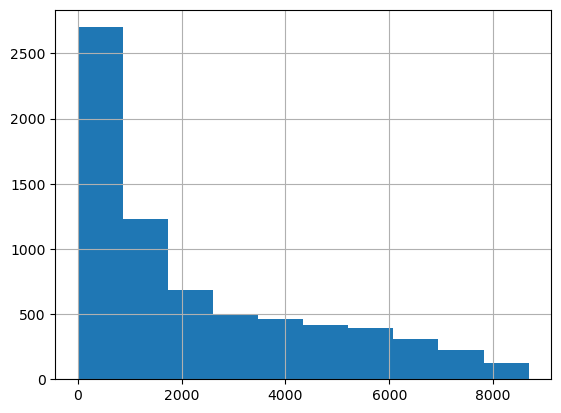

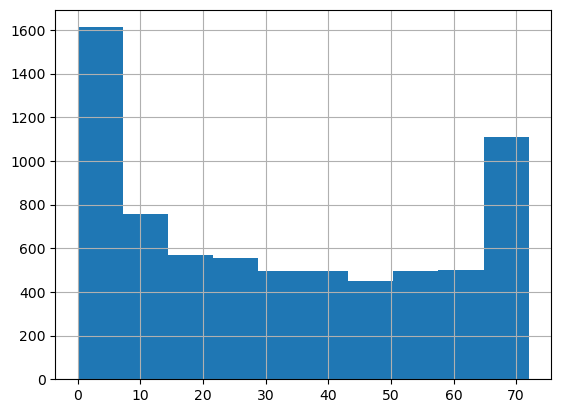

In [38]:
telco_df['total_charges'].hist()
plt.show()

telco_df['tenure'].hist()
plt.show()

In [39]:
r,p = stats.shapiro(telco_df.total_charges)

r,p

/usr/local/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8601522445678711, 0.0)

In [40]:
eval_dist(r,p)

 the data is NOT normally distributed


In [41]:
sr,sp = stats.spearmanr(telco_df['tenure'], telco_df['total_charges'])
sr,sp

(0.8896957900597577, 0.0)

In [42]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


H$_0$: There is no linear correlation between tenure and monthly charges of phone & internet customers

H$_α$: There is a linear correlation between tenure and monthly charges of phone & internet customers

In [43]:
α = 0.05

In [44]:
control_df = telco_churn_df[(telco_churn_df['phone_service'] == "Yes") & (telco_churn_df['internet_service_type_id'] == 1)][['monthly_charges', 'tenure']]

In [45]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


In [46]:
r,p = stats.shapiro(control_df['monthly_charges'])
r,p

(0.9584367871284485, 7.018878923260152e-22)

In [47]:
eval_dist(r,p)

 the data is NOT normally distributed


In [48]:
r,p = stats.shapiro(control_df['tenure'])
r,p

(0.8991785645484924, 2.3522259094488155e-32)

In [49]:
eval_dist(r,p)

 the data is NOT normally distributed


In [50]:
sr,sp = stats.spearmanr(control_df['tenure'], control_df['monthly_charges'])
sr,sp

(0.6644708508462759, 5.423601644635052e-222)

In [52]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.664471
P-value: 5.423601644635052e-222


### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [56]:
employees_db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
employee_query = "SELECT * FROM employees JOIN salaries USING (emp_no) WHERE to_date = '9999-01-01';"
employee_df = pd.read_sql(employee_query, employees_db_url)

In [57]:
employee_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [59]:
employee_df['days_employed'] = (employee_df['to_date'] - employee_df['from_date']).astype(str).str.split(' ', expand = True)[0]

In [70]:
employee_df['days_employed'] = employee_df['days_employed'].astype('int')

In [71]:
tenure_df = employee_df[['days_employed', 'salary']]

In [72]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   days_employed  240124 non-null  int64
 1   salary         240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [74]:
r,p = stats.shapiro(tenure_df['days_employed'])
r,p

(0.9549970030784607, 0.0)

In [75]:
eval_dist(r,p)

 the data is NOT normally distributed


In [76]:
r,p = stats.shapiro(tenure_df['salary'])
r,p

(0.9688956141471863, 0.0)

In [77]:
eval_dist(r,p)

 the data is NOT normally distributed


In [78]:
sr,sp = stats.spearmanr(tenure_df['days_employed'], tenure_df['salary'])
sr,sp

(-0.051148611931195756, 8.14728490436983e-139)

In [79]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: -0.051149
P-value: 8.14728490436983e-139


### 4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [ ]:
sleep = data('sleepstudy')

In [ ]:
sleep

In [ ]:
corr, p = stats.pearsonr(sleep['Days'], sleep['Reaction'])
corr, p

In [ ]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

# Exercices IV - Comparison of Means

### 1.Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
One Sample Two-Tailed T-Test
- Are adults who drink milk taller than adults who don't drink milk?
Two Sample One-Tailed T-Test
- Is the price of gas higher in Texas or in New Mexico?
Two Sample One-Tailed T-Test
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
ANOVA

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Two-sample T-Test needed

H$_0$ = The average time taken to sell homes between two offices is the same.

H$_α$ = The average time taken to sell homes between two offices is significantly different.

Office 1 has a sample size of 40, a mean of 90 days, and std of 15 days.

Office 2 has a sample size of 50, mean of 100, and std or 20.

In [58]:
stats.ttest_ind_from_stats?

Signature:
stats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
    alternative='two-sided',
)
Docstring:
T-test for means of two independent samples from descriptive statistics.

This is a test for the null hypothesis that two independent
samples have identical average (expected) values.

Parameters
----------
mean1 : array_like
    The mean(s) of sample 1.
std1 : array_like
    The corrected sample standard deviation of sample 1 (i.e. ``ddof=1``).
nobs1 : array_like
    The number(s) of observations of sample 1.
mean2 : array_like
    The mean(s) of sample 2.
std2 : array_like
    The corrected sample standard deviation of sample 2 (i.e. ``ddof=1``).
nobs2 : array_like
    The number(s) of observations of sample 2.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
   

In [88]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50)
t, p

(-2.6252287036468456, 0.01020985244923939)

In [89]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

We need a two-sample t test

H$_0$ = There is no significant difference in fuel-efficiency in cars from 2008 and 1999.

H$_α$ = There is a significant difference in fuel-efficiency in cars from 2008 and 1999.

In [81]:
α = 0.05

In [82]:
mpg = data('mpg')

In [83]:
ninety_nine = mpg[mpg['year'] == 1999]

In [84]:
ninety_nine['fuel_efficiency'] = ((ninety_nine['hwy']-ninety_nine['cty']) / 2)

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/2702583412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninety_nine['fuel_efficiency'] = ((ninety_nine['hwy']-ninety_nine['cty']) / 2)


In [133]:
ninety_nine.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,5.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,4.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,5.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,4.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,4.0


In [86]:
oh_eight = mpg[mpg['year'] == 2008]

In [87]:
oh_eight['fuel_efficiency'] = ((oh_eight['hwy']-oh_eight['cty']) / 2)

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/3219922652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oh_eight['fuel_efficiency'] = ((oh_eight['hwy']-oh_eight['cty']) / 2)


In [89]:
print(ninety_nine['fuel_efficiency'].var())
print(oh_eight['fuel_efficiency'].var())

1.3282493368700248
1.2280430297671665


In [90]:
t, p = stats.ttest_ind(ninety_nine['fuel_efficiency'], oh_eight['fuel_efficiency'], equal_var=True)
t, p

(-1.156463161733102, 0.24868119752480505)

In [91]:
print("Is p/2 < α? ", p / 2 < α)
print("Is t < 0? ", t < 0)

Is p/2 < α?  False
Is t < 0?  True


We fail to reject the null hypothesis.

We need a one-sample t test

H$_0$ = Mean of average fuel efficiency in compact cars <= Mean of average fuel efficiency in all cars.

H$_α$ = Mean of average fuel efficiency in compact cars > Mean of average fuel efficiency in all cars.

In [97]:
compact_car = mpg[mpg['class'] == 'compact']

In [98]:
compact_car['fuel_efficiency'] = ((compact_car['hwy']-compact_car['cty']) / 2)

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/2074857138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compact_car['fuel_efficiency'] = ((compact_car['hwy']-compact_car['cty']) / 2)


In [99]:
mpg['fuel_efficiency'] = ((mpg['hwy']-mpg['cty']) / 2)

In [100]:
mean_mpg = mpg['fuel_efficiency'].mean()

In [102]:
t, p = stats.ttest_1samp(compact_car['fuel_efficiency'],mean_mpg)
t, p

(8.2278334022059, 1.367789376516643e-10)

In [103]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


We need a two-sample t test

H$_0$ = Average fuel efficiency in manual cars <= Average fuel efficiency in automatic cars.

H$_α$ = Average fuel efficiency in manual cars > Average fuel efficiency in automatic cars.

In [106]:
man_car = mpg[mpg['trans'].str.startswith('manual')]

In [107]:
auto_car = mpg[mpg['trans'].str.startswith('auto')]

In [108]:
man_car['fuel_efficiency'] = ((man_car['hwy']-man_car['cty']) / 2)

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/1121789998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_car['fuel_efficiency'] = ((man_car['hwy']-man_car['cty']) / 2)


In [109]:
auto_car['fuel_efficiency'] = ((auto_car['hwy']-auto_car['cty']) / 2)

/var/folders/sw/4nk3j1h92wb2t79pkgpn3gcw0000gp/T/ipykernel_2677/1312375792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_car['fuel_efficiency'] = ((auto_car['hwy']-auto_car['cty']) / 2)


In [110]:
lev_stat, p = stats.levene(man_car['fuel_efficiency'], auto_car['fuel_efficiency'])
p, lev_stat

(0.21302938500646737, 1.5592790219852894)

In [111]:
print(man_car['fuel_efficiency'].var())
print(auto_car['fuel_efficiency'].var())

1.2077922077922092
1.2731300016331877


In [112]:
t, p = stats.ttest_ind(man_car['fuel_efficiency'], auto_car['fuel_efficiency'], equal_var=True)
t, p

(2.502481608728934, 0.013022062490122612)

In [135]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


# Bonus Exercises

### Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.

In [215]:
# this one looks interesting to draw comparisons from.
feature_color = data('HairEyeColor')

In [259]:
#This is so much nicer to look at
index = ['Black Hair & Brown Eyes', 'Brown Hair & Brown Eyes', 'Red Hair & Brown Eyes', 'Blond Hair & Brown Eyes',
         'Black Hair & Blue Eyes', 'Brown Hair & Blue Eyes', 'Red Hair & Blue Eyes', 'Blond Hair & Blue Eyes', 
         'Black Hair & Hazel Eyes','Brown Hair & Hazel Eyes', 'Red Hair & Hazel Eyes', 'Blond Hair & Hazel Eyes',
        'Black Hair & Green Eyes','Brown Hair & Green Eyes', 'Red Hair & Green Eyes', 'Blond Hair & Green Eyes']
columns = ['Frequency of Male', 'Frequency of Female']
feature_df = pd.DataFrame([[32, 36], [53, 66], [10, 16], [3, 4], [11, 9], [50, 34], [10, 7], [30, 64],
                        [10, 5], [25, 29], [7, 7], [5, 5], [3, 2], [15, 14], [7, 7], [8, 8]],
                        index=index, columns=columns)
feature_df

,Frequency of Male,Frequency of Female
Black Hair & Brown Eyes,32,36
Brown Hair & Brown Eyes,53,66
Red Hair & Brown Eyes,10,16
Blond Hair & Brown Eyes,3,4
Black Hair & Blue Eyes,11,9
Brown Hair & Blue Eyes,50,34
Red Hair & Blue Eyes,10,7
Blond Hair & Blue Eyes,30,64
Black Hair & Hazel Eyes,10,5
Brown Hair & Hazel Eyes,25,29


In [300]:
colored_eyes_df = feature_df[~feature_df.index.str.endswith('Brown Eyes')]

In [301]:
colored_eyes_df

,Frequency of Male,Frequency of Female
Black Hair & Blue Eyes,11,9
Brown Hair & Blue Eyes,50,34
Red Hair & Blue Eyes,10,7
Blond Hair & Blue Eyes,30,64
Black Hair & Hazel Eyes,10,5
Brown Hair & Hazel Eyes,25,29
Red Hair & Hazel Eyes,7,7
Blond Hair & Hazel Eyes,5,5
Black Hair & Green Eyes,3,2
Brown Hair & Green Eyes,15,14


In [261]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


279

### χ$^2$ Test

H$_0$ = Having colored eyes (not brown) is independent of gender.

H$_α$ = Having colored eyes (not brown) is dependent of gender.

### T-Test

H$_0$ = Average frequency of colored eyes (not brown) in women is <= Average frequency of colored eyes (not brown) in men

H$_α$ = Average frequency of colored eyes (not brown) in women is > Average frequency of colored eyes (not brown) in men

In [303]:
α = .05

In [302]:
t, p = stats.ttest_ind(colored_eyes_df['Frequency of Male'], colored_eyes_df['Frequency of Female'], equal_var=False)
t, p

(-0.12757947850111193, 0.8997288355378145)

In [305]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis
